# Curso: Aprendizaje Automático
# Trabajo Práctico 3

Profesor: Luis Alexánder Calvo Valverde

Instituto Tecnológico de Costa Rica

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 4 de Noviembre 2024, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido)

Estudiante(s):
1. **Agustin Vargas Quesada**




___

# Regresión
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (diamonds), si desea conocer un poco de los atributos puede consultar en: https://www.kaggle.com/datasets/shivam2503/diamonds
- Note que en la página proporcionada se mencionan más atributos de los que contiene el archivo facilitado.  
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: price.
- Debe comentar ampliamente su código


In [1]:
!pip install tabulate

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import math


### 1 (10 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


In [3]:
# Cargar el archivo
df = pd.read_csv('diamonds.csv', delimiter=',')

In [4]:
print(tabulate(df.head(5), headers='keys', tablefmt='grid'))

+----+---------+---------+---------+---------+------+------+------+-------+
|    |   carat |   depth |   table |   price |    x |    y |    z |   cut |
+====+=========+=========+=========+=========+======+======+======+=======+
|  0 |    0.23 |    61.5 |      55 |     326 | 3.95 | 3.98 | 2.43 |     4 |
+----+---------+---------+---------+---------+------+------+------+-------+
|  1 |    0.21 |    59.8 |      61 |     326 | 3.89 | 3.84 | 2.31 |     3 |
+----+---------+---------+---------+---------+------+------+------+-------+
|  2 |    0.23 |    56.9 |      65 |     327 | 4.05 | 4.07 | 2.31 |     1 |
+----+---------+---------+---------+---------+------+------+------+-------+
|  3 |    0.29 |    62.4 |      58 |     334 | 4.2  | 4.23 | 2.63 |     3 |
+----+---------+---------+---------+---------+------+------+------+-------+
|  4 |    0.31 |    63.3 |      58 |     335 | 4.34 | 4.35 | 2.75 |     1 |
+----+---------+---------+---------+---------+------+------+------+-------+


In [5]:
missing_values = df.isnull().sum()
print(missing_values)

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
cut      0
dtype: int64


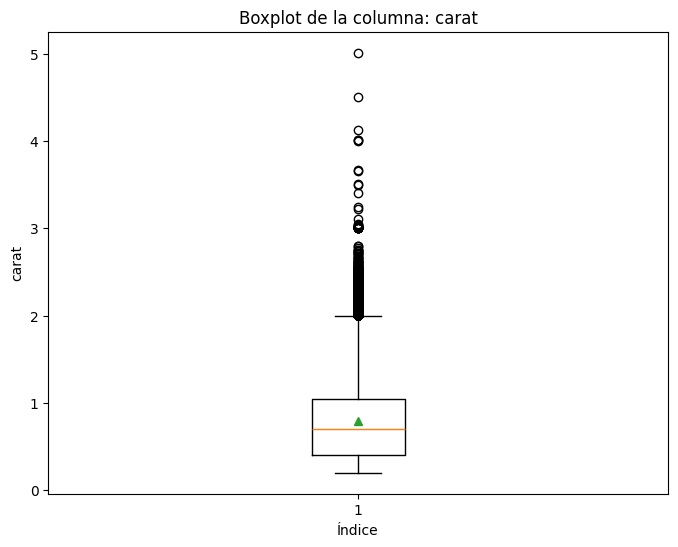

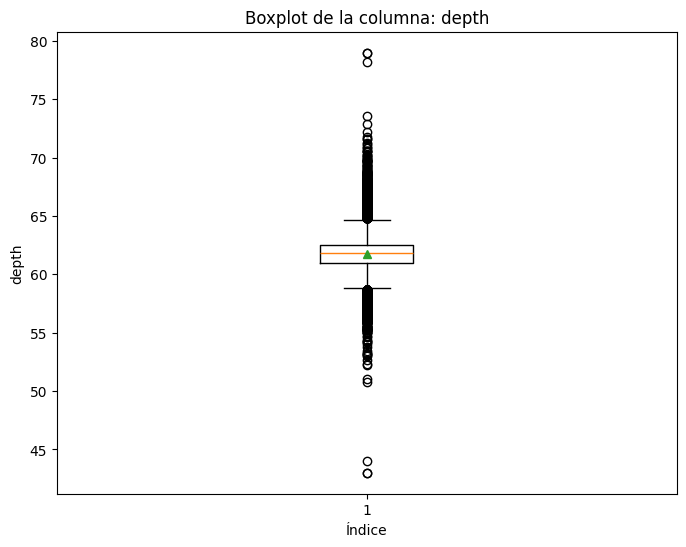

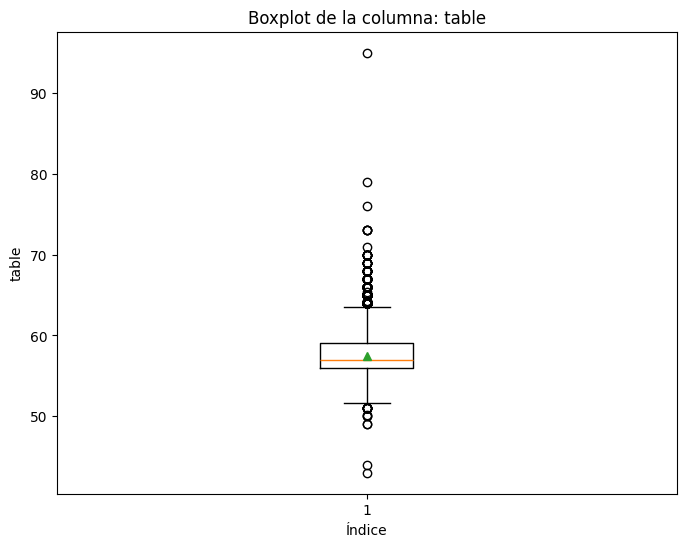

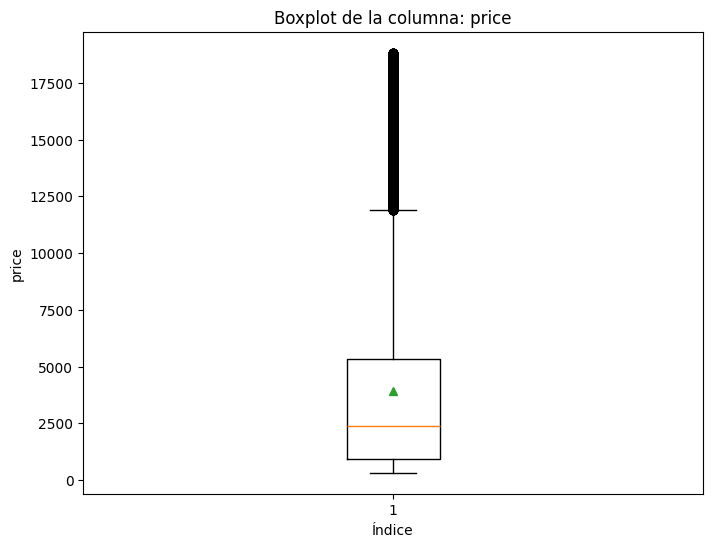

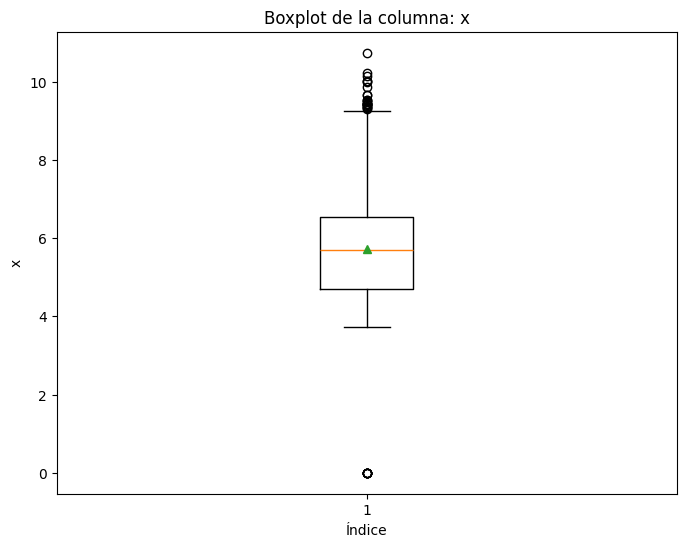

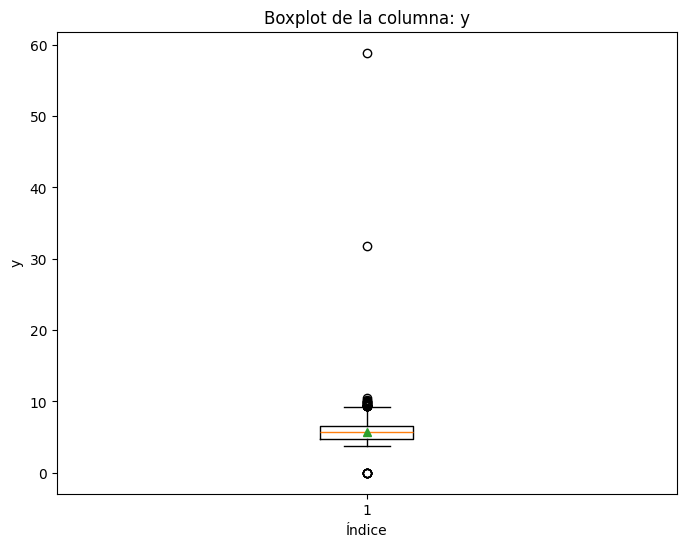

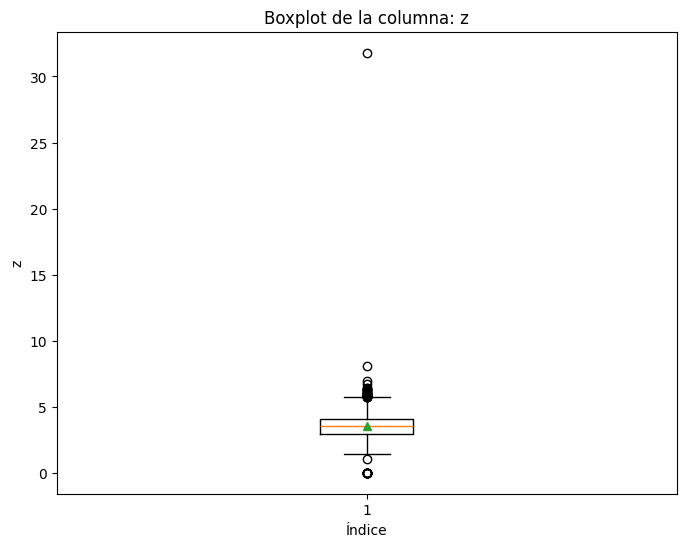

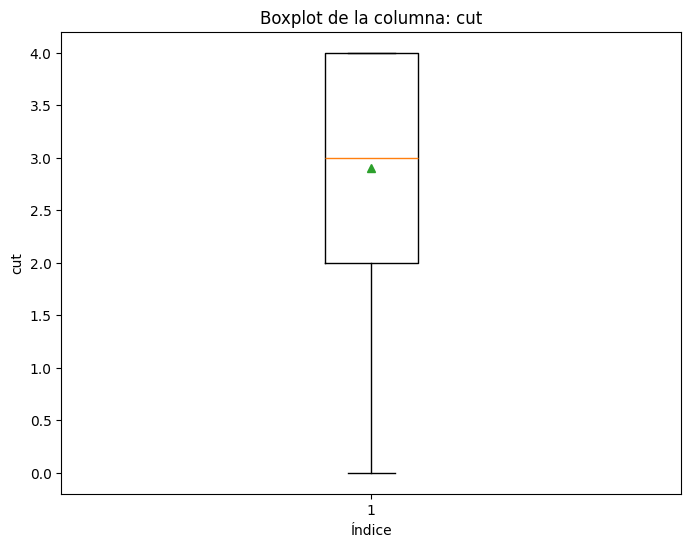

In [6]:
def visualizar_boxplot_por_columna(df):
    # Seleccionar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Crear un boxplot para cada columna numérica
    for column in numeric_columns:
        pyplot.figure(figsize=(8, 6))
        pyplot.boxplot(df[column], showmeans=True)
        pyplot.title(f'Boxplot de la columna: {column}')
        pyplot.xlabel('Índice')
        pyplot.ylabel(column)
        pyplot.show()

visualizar_boxplot_por_columna(df)

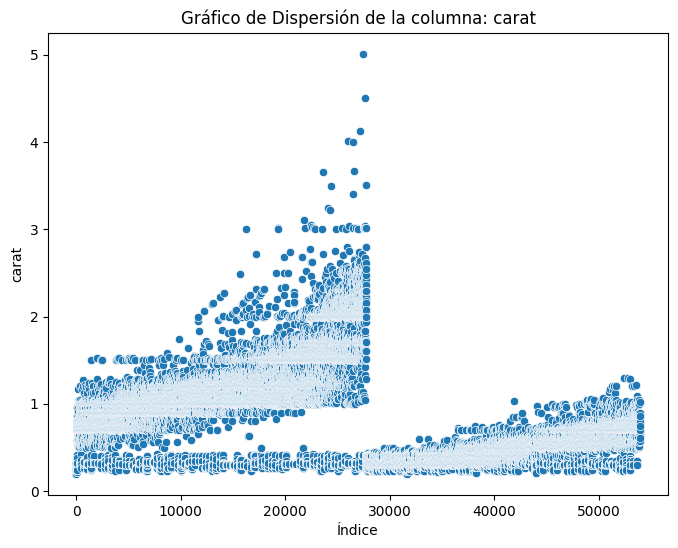

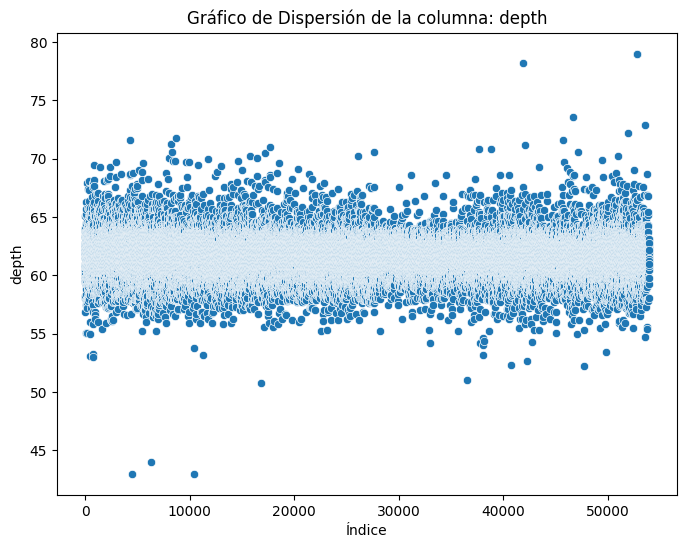

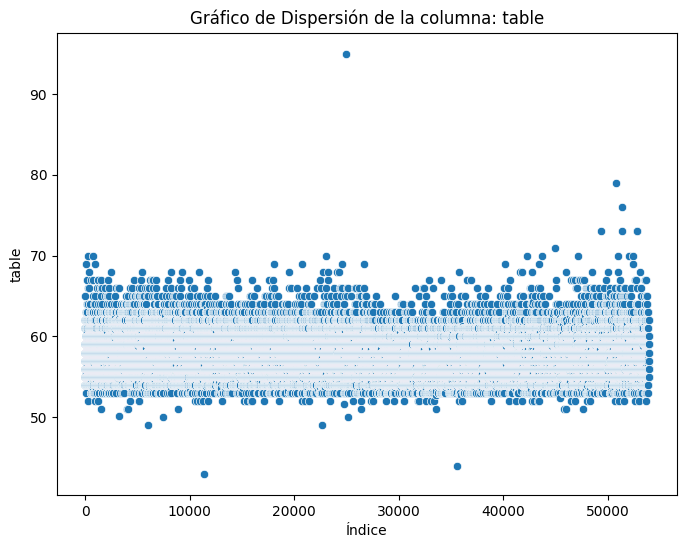

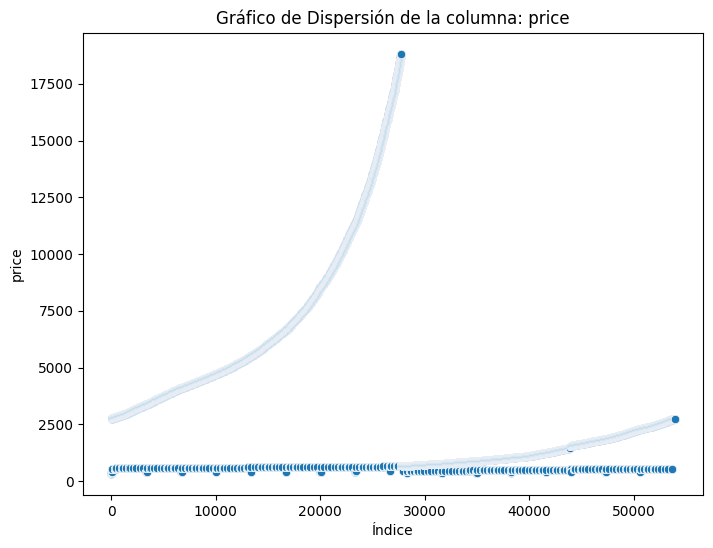

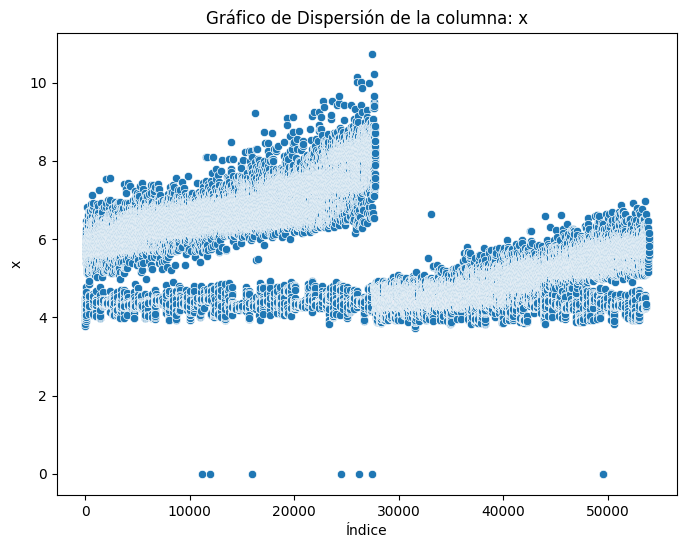

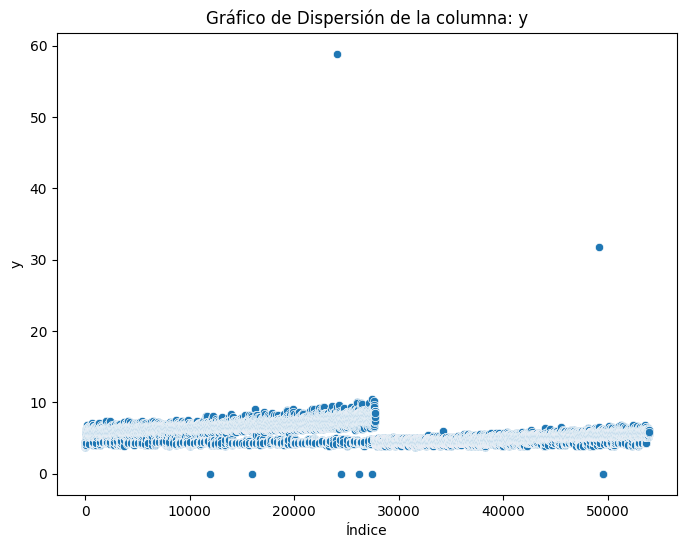

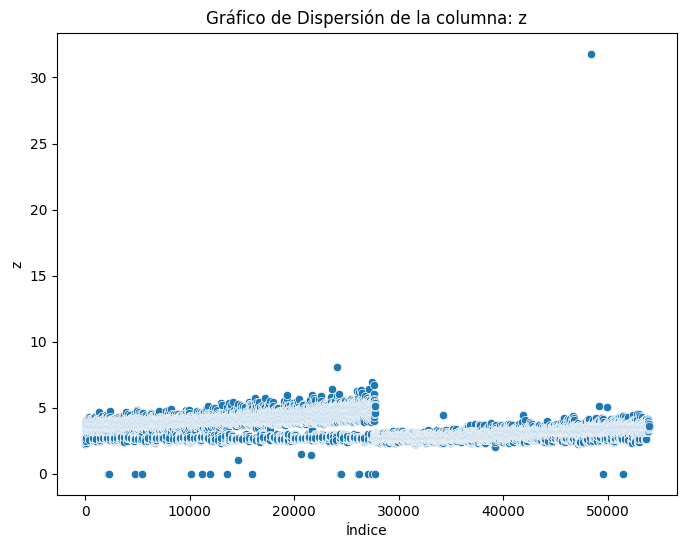

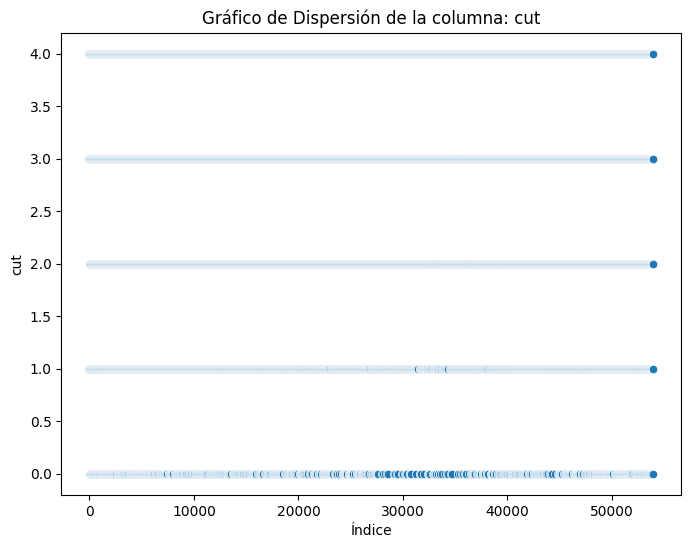

In [7]:
def visualizar_scatter_por_columnas(df):
    # Seleccionar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Crear un gráfico de dispersión para cada columna numérica
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df.index, y=df[column])
        plt.title(f'Gráfico de Dispersión de la columna: {column}')
        plt.xlabel('Índice')
        plt.ylabel(column)
        plt.show()

visualizar_scatter_por_columnas(df)

In [8]:
def cantidad_outliers_por_columna(df):
    # Seleccionar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Calcular outliers para cada columna numérica
    for columna in numeric_columns:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar los outliers
        outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
        print(f"Número de outliers en la columna {columna}: {len(outliers)}")

cantidad_outliers_por_columna(df)


Número de outliers en la columna carat: 1889
Número de outliers en la columna depth: 2545
Número de outliers en la columna table: 605
Número de outliers en la columna price: 3540
Número de outliers en la columna x: 32
Número de outliers en la columna y: 29
Número de outliers en la columna z: 49
Número de outliers en la columna cut: 0


In [9]:
def cantidad_ceros (dataset, columns):
    num_cero_values = (dataset[columns] == 0).sum()
    return num_cero_values

num_cero_values = cantidad_ceros (df,['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut'])

print("===== Columnas con ceros =====")
print(num_cero_values)

===== Columnas con ceros =====
carat       0
depth       0
table       0
price       0
x           8
y           7
z          20
cut      1610
dtype: int64


Con los analisis que se realizaron anteriormente podemos ver que:
- En todas las columnas hay muchos outliers lo cual nos puede perjudicar al momento de realizar la prediccion, para esto se utilizaron boxplots y graficos de dispersion donde se puede observar la forma en la que se comportan los datos.
- Tambien que nuestra varibale 'y' no se encuentra al final del data set si no que ese encuentra en el medio por lo tanto se debe de usar una tecnica especifica para poder obtener esta variable.
- Segun el analisis no se encuentran valores vacios.
- Todos los datos que se encuentran en el dataset son de tipo int.
- En las columnas x, y , z y vut hay valores en cero

### 2 (10 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%).
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


In [10]:
X = df.drop('price', axis=1)
y = df['price']

# 30% test
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=30)

# 50% train, 20% validation
X_validation, X_train, y_validation, y_train = train_test_split( X_trainVal, y_trainVal, test_size=0.20, shuffle=True, random_state=30)


print("\nPrimeros 5 registros de X_test:")
print(X_test.head(5))
print("\nPrimeros 5 registros de y_test:")
print(y_test.head(5))

print("Primeros 5 registros de X_train:")
print(X_train.head(5))
print("\nPrimeros 5 registros de y_train:")
print(y_train.head(5))

print("\nPrimeros 5 registros de X_validation:")
print(X_validation.head(5))
print("\nPrimeros 5 registros de y_validation:")
print(y_validation.head(5))


print("\nTamaño del train: ", len(X_train))
print("\nTamaño del validation: ", len(X_validation))
print("\nTamaño del test: ", len(X_test))
print("\nCantidad de muestras: ", len(X_train)+len(X_validation)+len(X_test))



Primeros 5 registros de X_test:
       carat  depth  table     x     y     z  cut
21602   1.50   57.2   62.0  7.64  7.61  4.36    1
24463   1.52   61.6   56.0  7.37  7.43  4.56    2
1830    0.90   63.6   57.0  6.10  6.04  3.86    1
11573   1.15   61.7   59.0  6.68  6.73  4.14    4
29506   0.32   62.1   55.0  4.36  4.40  2.72    4

Primeros 5 registros de y_test:
21602     9702
24463    12730
1830      3060
11573     5038
29506      702
Name: price, dtype: int64
Primeros 5 registros de X_train:
       carat  depth  table     x     y     z  cut
53098   0.77   61.7   61.0  5.93  5.90  3.65    3
36584   0.33   61.8   54.0  4.47  4.49  2.77    4
7963    1.06   63.9   60.0  6.45  6.41  4.11    1
30163   0.40   63.0   57.0  4.66  4.70  2.95    2
45869   0.51   62.0   59.0  5.08  5.12  3.16    2

Primeros 5 registros de y_train:
53098    2614
36584     946
7963     4321
30163     720
45869    1716
Name: price, dtype: int64

Primeros 5 registros de X_validation:
       carat  depth  table     

Para esta seccion se coloco el shuffle en true para que en los conjuntos de datos queden bien distribuidos los datos de todo el dataset y el random state se esta utilizando una semilla la cual permite fijar la "semilla" de generación aleatoria, asegurando que los resultados sean reproducibles en cada ejecución, en este caso se esta utilizando la semilla 30, si este numero cambia se va a fijar otros valores aleatorios.
Por lo tanto para esta seccion se realizo que para el test se quedara con el 30% de los datos, para el train el 50% de los datos y para el validation el 20% de los datos.

### 3  (20 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

In [11]:
def reemplazar_ceros_con_media(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for column in numeric_columns:
        mean = df[df[column] != 0][column].mean()
        zeros_mask = df[column] == 0
        
        if df[column].dtype == 'int64':
            df[column] = df[column].astype('float64')
            df.loc[zeros_mask, column] = round(mean)
            df[column] = df[column].astype('int64')
        else:
            df.loc[zeros_mask, column] = round(mean, 2)
    
    return df

reemplazar_ceros_con_media(df)
num_cero_values = cantidad_ceros (df,['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut'])

print("===== Columnas con ceros =====")
print(num_cero_values)

===== Columnas con ceros =====
carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
cut      0
dtype: int64


In [12]:
def manejo_outliers(df, std_thresh=2):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            mean = df[column].mean()
            std = df[column].std()
            outliers = np.abs(df[column] - mean) > std_thresh * std
            
            if df[column].dtype == 'int64':
                mean_int = int(round(mean))
                df.loc[outliers, column] = mean_int
            else:
                df.loc[outliers, column] = round(mean, 2)
    
    return df
    
manejo_outliers(df)
cantidad_outliers_por_columna(df)


Número de outliers en la columna carat: 0
Número de outliers en la columna depth: 1074
Número de outliers en la columna table: 30
Número de outliers en la columna price: 1919
Número de outliers en la columna x: 0
Número de outliers en la columna y: 0
Número de outliers en la columna z: 0
Número de outliers en la columna cut: 0


df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

Durante la exploracion de los datos se encontro que habian valores en 0, por lo que primero se realizo fue transformar estos valores a la media de la columna, tambien que como habian valores outliers estos se trataron siendo reemplazados con la media haciendo uso de un atributo que se lo denominamos std_thresh el cual representa el número de desviaciones estándar a partir de la media que se consideran como outliers el cual con un valor mas alto detectara menos outliers y con un valor mas bajo detectara mas outliers. En este caso se utilizo un std_thresh ya que probando fue el que mejor resultados dio

### 4 (10 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- Comente sus conclusiones.


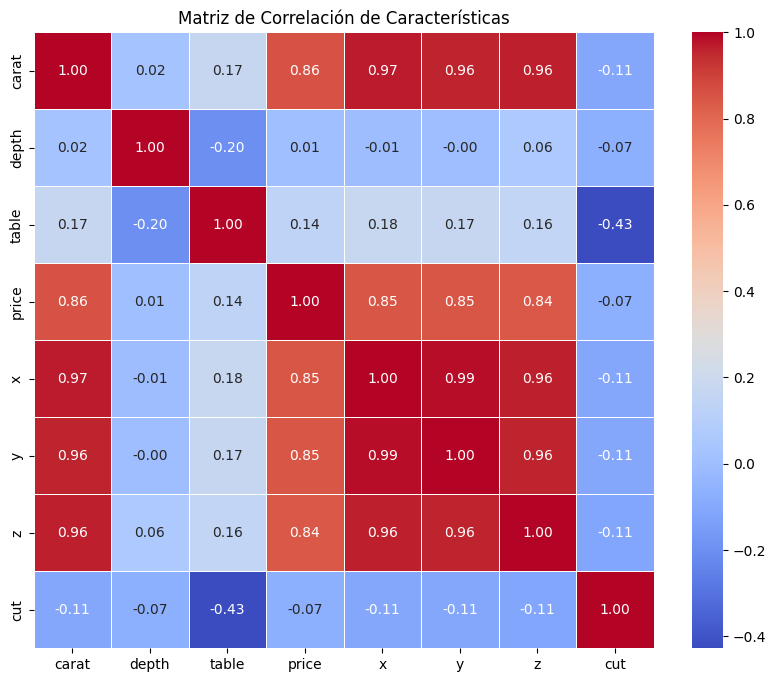

Características seleccionadas: Index(['price', 'carat', 'x', 'y', 'z'], dtype='object')


In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Características")
plt.show()

correlation_target = correlation_matrix["price"].abs().sort_values(ascending=False)

selected_features = correlation_target[correlation_target > 0.5].index

df_selected = df[selected_features]

print("Características seleccionadas:", selected_features)

Para esta seccion se realizo utilizando el metodo FIlter ya que segun lo visto en clase y el material de apoyo esta se adapta mejor a datasets que contengan numeros, por lo que se decidio usar esta tecnica, se muestra una matriz de correlacion donde para que sea aceptable y que los atributos se relacionen tiene que superar el 0.5 con respecto a la columna de salida que es el price.

### 1.5  (10 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'diamondsPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


In [14]:
def escalar_datos_robust(df, agregar_bias=False):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    scaler = RobustScaler()
    
    for column in numeric_columns:
        df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    if agregar_bias:
        df['bias'] = 1
    
    return df

escalar_datos_robust(df, agregar_bias=False)

df.to_csv('diamondsPROCESADO.csv', index=False)

print("\nEstadísticas del DataFrame escalado con RobustScaler:")
print(df.describe())


Estadísticas del DataFrame escalado con RobustScaler:
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.065029     -0.013705      0.105540      0.229786     -0.034629   
std        0.619384      0.822572      0.913366      0.759961      0.576882   
min       -0.819672     -2.230769     -2.000000     -0.587819     -1.132184   
25%       -0.491803     -0.461538     -0.500000     -0.411048     -0.568966   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.508197      0.538462      0.500000      0.588952      0.431034   
max        1.704918      2.153846      2.450000      2.692635      1.304598   

                  y             z           cut  
count  53940.000000  53940.000000  53940.000000  
mean      -0.033583     -0.040213      0.175547  
std        0.579186      0.572411      0.769883  
min       -1.166667     -1.183486

Para este punto se utlizo el metodo de RobustScaler, ya que viendo ols datos despues de preprocesarlos este quedo con unos outliers, segun la documentacion y lo que se investigo el RObust scaler tiene un mejor manejo con los outliers y con el bias los mismo modelos de scikit-learn se encarga de manejar el bias por defecto solo que no se muestra visualmente, en la funcion de transformacion se agrego un parametro agregar_bias si es el caso de que se quiera mostrar la columna de manera visual.

### 1.6 (30 puntos)
Presente e implemente un diseño experimental que incluya:
- Dos algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Usted eligirá un método más, que no sea de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor. Para el segundo método deberá elegir al menos un hiperparámetro.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para el otro método, debe usar ten-cross-validation para seleccionar al menos un hiperparámetro.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección).
    
**Nota:** Para el algoritmos seleccionados (no el OLSR) explique los parámetros que recibe según la biblioteca utilizada.
    

In [15]:
df_preprocesado = pd.read_csv('diamondsPROCESADO.csv', delimiter=',')

X_preprocesado = df_preprocesado.drop('price', axis=1)
y_preprocesado = df_preprocesado['price']

# 30% test
X_trainVal_preprocesado, X_test_preprocesado, y_trainVal_preprocesado, y_test_preprocesado = train_test_split(X_preprocesado, 
                                                                                                              y_preprocesado, 
                                                                                                              test_size=0.30, 
                                                                                                              shuffle=True, 
                                                                                                              random_state=30)

# 50% train, 20% validation
X_validation_preprocesado, X_train_preprocesado, y_validation_preprocesado, y_train_preprocesado = train_test_split( X_trainVal_preprocesado,
                                                                                                                    y_trainVal_preprocesado,
                                                                                                                    test_size=0.20,
                                                                                                                    shuffle=True,
                                                                                                                    random_state=30)


print("\nPrimeros 5 registros de X_test:")
print(X_test_preprocesado.head(5))
print("\nPrimeros 5 registros de y_test:")
print(y_test_preprocesado.head(5))

print("Primeros 5 registros de X_train:")
print(X_train_preprocesado.head(5))
print("\nPrimeros 5 registros de y_train:")
print(y_train_preprocesado.head(5))

print("\nPrimeros 5 registros de X_validation:")
print(X_validation_preprocesado.head(5))
print("\nPrimeros 5 registros de y_validation:")
print(y_validation_preprocesado.head(5))


print("\nTamaño del train: ", len(X_train_preprocesado))
print("\nTamaño del validation: ", len(X_validation_preprocesado))
print("\nTamaño del test: ", len(X_test_preprocesado))
print("\nCantidad de muestras: ", len(X_train_preprocesado)+len(X_validation_preprocesado)+len(X_test_preprocesado))


Primeros 5 registros de X_test:
          carat     depth  table         x         y         z  cut
21602  1.311475 -0.038462   0.23  1.114943  1.091954  0.761468  0.0
24463  1.344262 -0.153846  -0.50  0.959770  0.988506  0.944954 -1.0
1830   0.327869  1.384615   0.00  0.229885  0.189655  0.302752  0.0
11573  0.737705 -0.076923   1.00  0.563218  0.586207  0.559633  1.0
29506 -0.622951  0.230769  -1.00 -0.770115 -0.752874 -0.743119  1.0

Primeros 5 registros de y_test:
21602    2.068272
24463    0.433994
1830     0.186686
11573    0.747025
29506   -0.481303
Name: price, dtype: float64
Primeros 5 registros de X_train:
          carat     depth  table         x         y         z  cut
53098  0.114754 -0.076923    2.0  0.132184  0.109195  0.110092  0.0
36584 -0.606557  0.000000   -1.5 -0.706897 -0.701149 -0.697248  1.0
7963   0.590164  1.615385    1.5  0.431034  0.402299  0.532110  0.0
30163 -0.491803  0.923077    0.0 -0.597701 -0.580460 -0.532110 -1.0
45869 -0.311475  0.153846    1.0 -0

In [16]:
def calcular_metricas(y_true, y_pred, titulo=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\nMétricas para {titulo}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return rmse, r2

X_train_full_preprocesado = pd.concat([X_train_preprocesado, X_validation_preprocesado])
y_train_full_preprocesado = pd.concat([y_train_preprocesado, y_validation_preprocesado])

modelo_lr = LinearRegression()
modelo_lr.fit(X_train_full_preprocesado, y_train_full_preprocesado)

y_pred_train = modelo_lr.predict(X_train_full_preprocesado)
y_pred_test = modelo_lr.predict(X_test_preprocesado)

print("\n=== Resultados de Regresión Lineal (OLSR) con datos preprocesados ===")
rmse_train, r2_train = calcular_metricas(y_train_full_preprocesado, y_pred_train, "conjunto de entrenamiento")
rmse_test, r2_test = calcular_metricas(y_test_preprocesado, y_pred_test, "conjunto de prueba")

metricas_olsr = {
    'modelo': 'OLSR',
    'rmse_train': rmse_train,
    'r2_train': r2_train,
    'rmse_test': rmse_test,
    'r2_test': r2_test
}



=== Resultados de Regresión Lineal (OLSR) con datos preprocesados ===

Métricas para conjunto de entrenamiento:
RMSE: 0.39
R²: 0.7438

Métricas para conjunto de prueba:
RMSE: 0.38
R²: 0.7440


In [17]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    return rmse, r2

param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 15, 20]         # Profundidad máxima de los árboles
}

# Inicializar la validación cruzada
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [18]:
results = []

# Iteramos sobre los hiperparámetros
for n_est in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        print(f"\nProbando: n_estimators={n_est}, max_depth={depth}")
        
        # Entrenamos el modelo con los datos de entrenamiento
        rf = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=depth,
            random_state=42
        )
        
        rf.fit(X_train_preprocesado, y_train_preprocesado)
        
        # Evaluamos en el conjunto de validación
        rmse_val, r2_val = evaluate_model(rf, X_validation_preprocesado, y_validation_preprocesado)
        
        results.append({
            'n_estimators': n_est,
            'max_depth': depth,
            'validation_rmse': rmse_val,
            'validation_r2': r2_val
        })
        
        print(f"Validación: RMSE = {rmse_val:.2f}, R2 = {r2_val:.4f}")

results_df = pd.DataFrame(results)
print("\nResumen de todos los resultados:")
print(results_df)



Probando: n_estimators=100, max_depth=10
Validación: RMSE = 0.36, R2 = 0.7721

Probando: n_estimators=100, max_depth=15
Validación: RMSE = 0.37, R2 = 0.7619

Probando: n_estimators=100, max_depth=20
Validación: RMSE = 0.38, R2 = 0.7561

Probando: n_estimators=200, max_depth=10
Validación: RMSE = 0.36, R2 = 0.7725

Probando: n_estimators=200, max_depth=15
Validación: RMSE = 0.37, R2 = 0.7626

Probando: n_estimators=200, max_depth=20
Validación: RMSE = 0.38, R2 = 0.7572

Probando: n_estimators=300, max_depth=10
Validación: RMSE = 0.36, R2 = 0.7726

Probando: n_estimators=300, max_depth=15
Validación: RMSE = 0.37, R2 = 0.7629

Probando: n_estimators=300, max_depth=20
Validación: RMSE = 0.38, R2 = 0.7577

Resumen de todos los resultados:
   n_estimators  max_depth  validation_rmse  validation_r2
0           100         10         0.364440       0.772078
1           100         15         0.372449       0.761950
2           100         20         0.376999       0.756097
3           200    

In [19]:
# Encontramos los mejores hiperparámetros
best_model_idx = results_df['validation_rmse'].idxmin()
best_params = results_df.iloc[best_model_idx]
print("\nMejores hiperparámetros encontrados:")
print(f"n_estimators: {best_params['n_estimators']}")
print(f"max_depth: {best_params['max_depth']}")
print(f"RMSE en validación: {best_params['validation_rmse']:.2f}")
print(f"R2 en validación: {best_params['validation_r2']:.4f}")

# Entrenamos el modelo final con los mejores hiperparámetros
final_model = RandomForestRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    random_state=42
)


# Entrenamos el modelo final
final_model.fit(X_train_preprocesado, y_train_preprocesado)

# Evaluamos en el conjunto de test
rmse_test, r2_test = evaluate_model(final_model, X_test_preprocesado, y_test_preprocesado)

print("\nResultados finales en el conjunto de test:")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.4f}")


Mejores hiperparámetros encontrados:
n_estimators: 300.0
max_depth: 10.0
RMSE en validación: 0.36
R2 en validación: 0.7726

Resultados finales en el conjunto de test:
RMSE: 0.36
R2: 0.7785


Para esta seccion se utilizo la regresion lineal como se indico en las isntrucciones, el cual posee las siguientes metricas en el conjunto de entrenamiento:
- RMSE: 0.39
- R²: 0.7438

Métricas para conjunto de prueba:
- RMSE: 0.38
- R²: 0.7440
.7440

Se selecciono el modelo de RandomForestRegressor el cual cuenta con los hiperparametros de n_estimators y max_depth. El n_estimators nos indica la candidad de arboles que se van a utilizar en el bosque, esto quiero decir que se crea un conjunto de árboles de decisión el cual se conoce como bosque, y cada árbol se entrena en una muestra aleatoria de los datos de entrenamiento. Los resultados se promedian para obtener la predicción final en un problema de regresión.
Y el max_depth nos ayuda a controlar la profundidad del arbol, esto quiere decir que se establece la profundidad máxima que puede alcanzar cada árbol en el bosque. La profundidad de un árbol es el número máximo de divisiones desde la raíz (nodo inicial) hasta la hoja más profunda.

Para probar estos dos hiperparametros se utilizo el KFold que utilizamos para dividir nuestro conjunto de datos en 3 partes y con un shuffle de true para que se mezclen los datos asi va a haber variabilidad en todo el proceso.

Al realizar el RandomForestRegressor se encontro que los mejores hiper parametreos son los siguientes:
- n_estimators: 300.0
- max_depth: 10.0


Ya que al evaluar el modelo con estos hiperparametros nos dio el siguiente resultado 
- RM36: 0.24
- 77260.8176


Y en el conjunto de entrenamiento se nos mostro los siguientes reusltados 

- RM36: 024- 
7785.813
7

### 1.7 (10 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Qué conclusiones finales saca sobre los métodos usados como predictores.


Tabla comparativa de resultados:
          Modelo  RMSE Test  R² Test
Regresión Lineal   0.382765 0.743968
   Random Forest   0.355990 0.778535


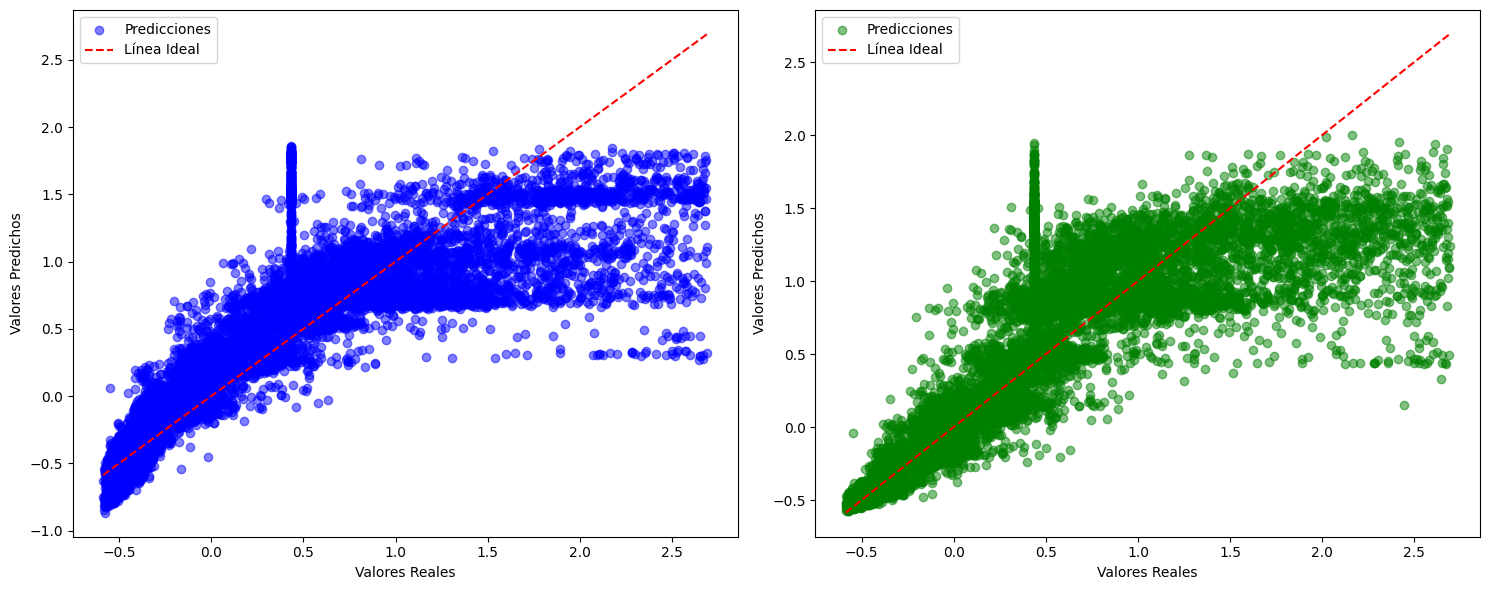

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_test_preprocesado, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
ax1.plot([y_test_preprocesado.min(), y_test_preprocesado.max()], 
         [y_test_preprocesado.min(), y_test_preprocesado.max()], 
         'r--', label='Línea Ideal')
ax1.set_xlabel('Valores Reales')
ax1.set_ylabel('Valores Predichos')
ax1.legend()

y_pred_rf = final_model.predict(X_test_preprocesado)
ax2.scatter(y_test_preprocesado, y_pred_rf, alpha=0.5, color='green', label='Predicciones')
ax2.plot([y_test_preprocesado.min(), y_test_preprocesado.max()], 
         [y_test_preprocesado.min(), y_test_preprocesado.max()], 
         'r--', label='Línea Ideal')
ax2.set_xlabel('Valores Reales')
ax2.set_ylabel('Valores Predichos')
ax2.legend()

plt.tight_layout()

resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'RMSE Test': [metricas_olsr['rmse_test'], rmse_test],
    'R² Test': [metricas_olsr['r2_test'], r2_test]
})

print("\nTabla comparativa de resultados:")
print(resultados.to_string(index=False))

plt.show()

De acuerdo a los dos metodos que se utilizaron se tuvo una mejora con el Random Forest ya que en la tabla podemos observar que el RMSE disminuye para el random forest y aumenta el R2.
Con respecto a los graficos se puede observar que en el random forest los valores estan un poco mas cercanos a la recta de los datos reales mientras que en la regresion lineal desde el inicio hay muchos datos dispersos que se podria decir que estan por debajo de los datos reales cosa que no sucede en el random forest. 